# Project Title: Exploring Crime Pattern in Malaysia from 2019 to 2022 Through Population and Unemployment Indicators

- #### Problem Statement:
Crime is a significant societal issue that affects the well-being, security, and economic stability of communities. Understanding the factors influencing crime rates can help policymakers, law enforcement, and social organizations develop effective strategies for prevention and intervention. This project focuses on analyzing crime patterns in Malaysia from 2019 to 2022, with a particular emphasis on two key indicators: population and unemployment.

- #### Objective: 
To explore potential correlations between crimes, population size, and unemployment rates at the state level by leveraging publicly available datasets.

- #### Features Definition:
1. Crimes: The number of actual crimes recorded, specifically cases where a conviction has been made. This ensures a focus on verified criminal activities rather than reported or suspected cases.
2. Population Size: The total population of a state, measured in millions.
3. Unemployment Rate: The percentage of the labor force that is unemployed.

- #### Hypothesis:
1. States with bigger population might have higher crime rates due to urbanization.
2. States with higher unemployment rate might have higher crime rates due to economic instability.
3. States with bigger population might have higher unemployment rate due to more competition for jobs.

- #### The datasets used in this project:
1. Crimes by District & Crime Type
    - Number of crimes in Malaysia by district, crime category, and type of crime.
    - Link: https://open.dosm.gov.my/data-catalogue/crime_district?visual=timeseries
2. Population Table: States
    - Population at state level from 1970 to 2024, by sex, age group and ethnicity.
    - Link: https://open.dosm.gov.my/data-catalogue/population_state
3. Annual Principal Labour Force Statistics by District
    - Annual principal labour force statistics at district level, including unemployment and participation rates.
    - https://open.dosm.gov.my/data-catalogue/lfs_district

***Note:*** In the original crime dataset, the crime data for W.P. Putrajaya and W.P. Labuan are included under W.P. Kuala Lumpur and Sabah, respectively. As a result, similar adjustments were made to the other datasets to ensure consistency.

## Importing Libraries and Loading Datasets

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_crime = pd.read_excel("crime_dataset.xlsx")
df_population = pd.read_excel("population_dataset.xlsx")
df_unemployment = pd.read_excel("unemployment_dataset.xlsx")

## Preparing the datasets

#### Inspecting the Crime Dataset

In [30]:
df_crime

,state,district,category,type,date,crimes
0,Malaysia,All,assault,all,2016-01-01,22327
1,Malaysia,All,assault,all,2017-01-01,21366
2,Malaysia,All,assault,all,2018-01-01,16902
3,Malaysia,All,assault,all,2019-01-01,16489
4,Malaysia,All,assault,all,2020-01-01,13279
...,...,...,...,...,...,...
19147,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2019-01-01,755
19148,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2020-01-01,646
19149,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2021-01-01,403
19150,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2022-01-01,369


In [31]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     19152 non-null  object        
 1   district  19152 non-null  object        
 2   category  19152 non-null  object        
 3   type      19152 non-null  object        
 4   date      19152 non-null  datetime64[ns]
 5   crimes    19152 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 897.9+ KB


#### Crime Data Preprocessing

In [32]:
# extract year from "date" and assign it to new column "year"
df_crime["year"] = df_crime["date"].dt.year

# defining the time range
start_year = 2019
end_year = 2022

# filter the data
filtered_df_crime = df_crime[
    (df_crime["state"] != "Malaysia") &
    (df_crime["year"] >= start_year) & 
    (df_crime["year"] <= end_year) &
    (df_crime["district"] == "All") &
    (df_crime["type"] == "all")
]

# aggregate "crimes", by "state", "year", and "category"
filtered_df_crime = filtered_df_crime.groupby(["state", "year", "category"], as_index=False)["crimes"].sum()

filtered_df_crime = filtered_df_crime.pivot_table(index=["state", "year"], columns="category", values="crimes", aggfunc="sum").reset_index()
filtered_df_crime.columns.name = None

# add new column "total_crimes" by adding number of crimes for both categories for each state every year
filtered_df_crime["total_crimes"] = filtered_df_crime["assault"] + filtered_df_crime["property"]
filtered_df_crime.drop(columns=["assault", "property"], inplace=True)

filtered_df_crime.sort_values(by=["state"], inplace=True)
filtered_df_crime.reset_index(drop=True, inplace=True)

# save the filtered data to Excel
filtered_df_crime.to_excel("filtered_crime_dataset.xlsx", index=False)
filtered_df_crime

,state,year,total_crimes
0,Johor,2019,9870
1,Johor,2020,7350
2,Johor,2021,4365
3,Johor,2022,4462
4,Kedah,2019,5615
5,Kedah,2020,4131
6,Kedah,2021,3801
7,Kedah,2022,4651
8,Kelantan,2019,3545
9,Kelantan,2020,2531


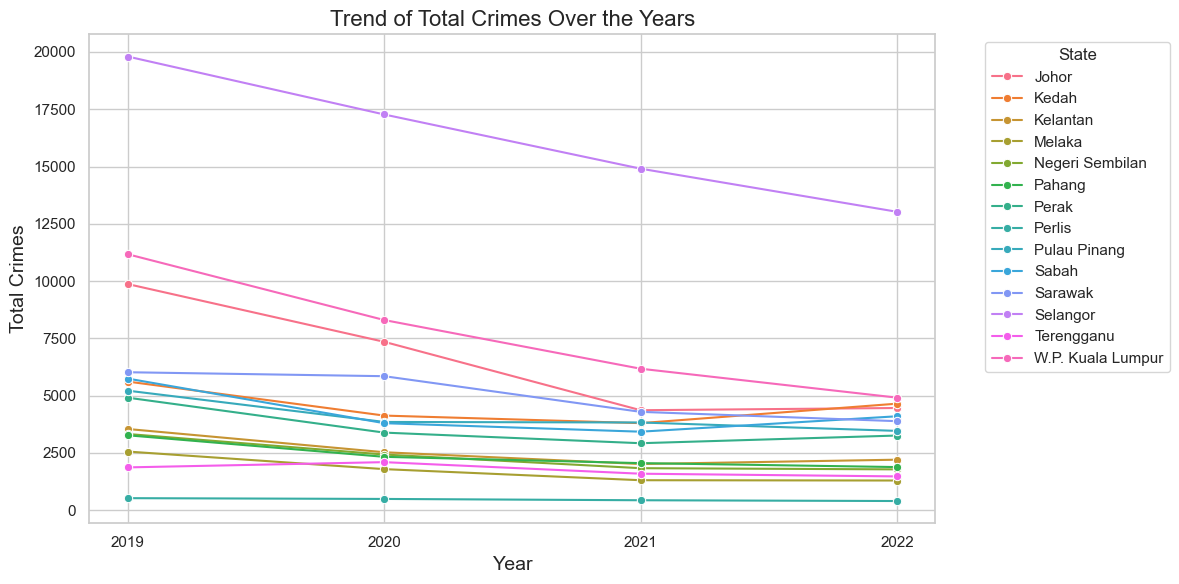

In [33]:
# plotting line plot for total crimes

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_crimes', data=filtered_df_crime, marker='o', hue='state')

# title and labels
plt.title('Trend of Total Crimes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)

plt.xticks(ticks=filtered_df_crime['year'].unique(), labels=filtered_df_crime['year'].unique())

# add legend
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The data shows a general decline in total crimes across most Malaysian states from 2019 to 2022. Selangor consistently had the highest crime rates, while Perlis had the lowest. Some states, like Johor and Kedah, saw a slight increase in crimes in 2022 after earlier declines. The earlier declines from 2019 to 2022 may be due to the COVID-19 pandemic where the Movement Control Order (MCO) was implemented.

#### Summarizing Total Crimes per State (2019 - 2022)

In [34]:
total_crimes_per_state = filtered_df_crime.groupby('state')['total_crimes'].sum().reset_index()
total_crimes_per_state.to_excel("final_crimes_dataset.xlsx", index=False)
total_crimes_per_state

,state,total_crimes
0,Johor,26047
1,Kedah,18198
2,Kelantan,10299
3,Melaka,6962
4,Negeri Sembilan,9377
5,Pahang,9542
6,Perak,14485
7,Perlis,1858
8,Pulau Pinang,16364
9,Sabah,17073


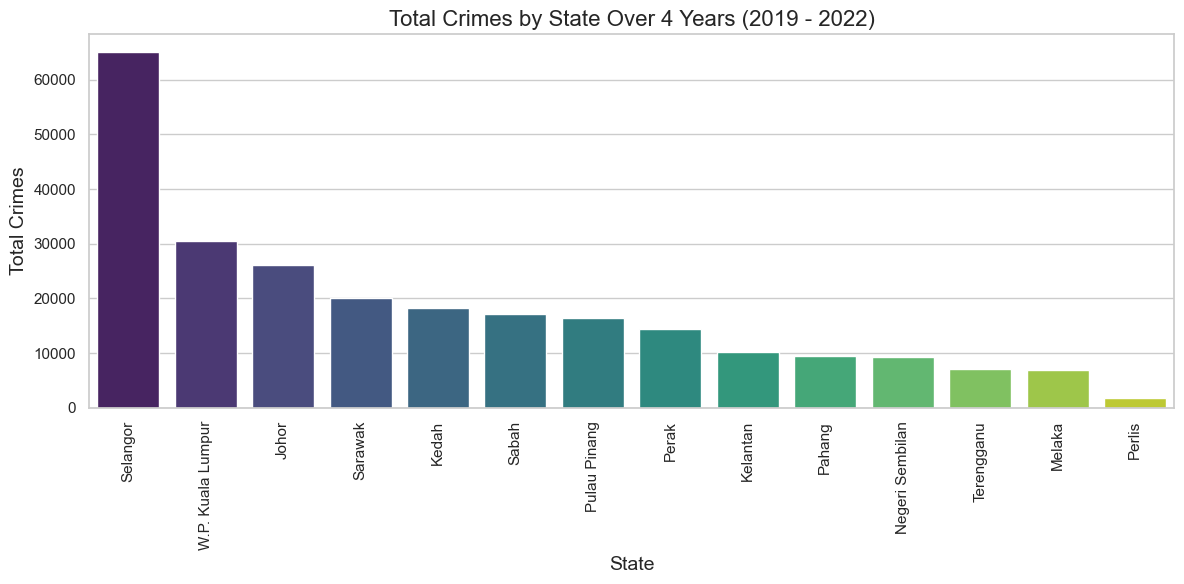

In [35]:
total_crimes_per_state_sorted = total_crimes_per_state.sort_values(by='total_crimes', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='total_crimes', data=total_crimes_per_state_sorted, hue='state', palette='viridis', legend=False)

plt.title('Total Crimes by State Over 4 Years (2019 - 2022)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


This bar plot indicates that Selangor, Kuala Lumpur, and Johor have the highest crime rates, likely because they are urban focal points. In contrast, Perlis, Melaka, and Terengganu have the lowest crime rates, possibly due to their rural nature and significant migration of residents to urban centers like Selangor, Kuala Lumpur, and Johor.

#### Inspecting the Population Dataset

In [36]:
df_population

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,2024-09-05 00:00:00,overall,215.7
3,Johor,1970-01-01,both,2014-10-01 00:00:00,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8
...,...,...,...,...,...,...
257290,W.P. Putrajaya,2024-01-01,male,85+,bumi_other,0.0
257291,W.P. Putrajaya,2024-01-01,male,85+,chinese,0.0
257292,W.P. Putrajaya,2024-01-01,male,85+,indian,0.0
257293,W.P. Putrajaya,2024-01-01,male,85+,other_citizen,0.0


In [37]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257295 entries, 0 to 257294
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   state       257295 non-null  object        
 1   date        257295 non-null  datetime64[ns]
 2   sex         257295 non-null  object        
 3   age         257295 non-null  object        
 4   ethnicity   257295 non-null  object        
 5   population  257295 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.8+ MB


#### Population Data Preprocessing

In [38]:
# extract year from "date" (converted into a datetime object) and assign it to new column "year"
# df_population["year"] = pd.to_datetime(df_population["date"], format="%d-%m-%Y").dt.year
df_population["year"] = df_population["date"].dt.year

# filter the data
filtered_df_population = df_population[
    (df_population["year"] >= start_year) & 
    (df_population["year"] <= end_year) &
    (df_population["sex"] == "both") &
    (df_population["age"] == "overall") &
    (df_population["ethnicity"] == "overall")
]

# replace "state" W.P. Putrajaya with W.P. Kuala Lumpur and W.P. Labuan with Sabah
filtered_df_population.loc[:, 'state'] = filtered_df_population['state'].replace({'W.P. Putrajaya': 'W.P. Kuala Lumpur', 'W.P. Labuan': 'Sabah'})

# aggregate "population" by "state" and "year"
filtered_df_population = filtered_df_population.groupby(['state', 'year'], as_index=False).agg({'population': 'sum'})

filtered_df_population['population'] = filtered_df_population['population'] / 1000

# save filtered data to an Excel
filtered_df_population.to_excel("filtered_population_dataset.xlsx", index=False)
filtered_df_population

,state,year,population
0,Johor,2019,3.7612
1,Johor,2020,4.0097
2,Johor,2021,4.0200
3,Johor,2022,4.0283
4,Kedah,2019,2.1737
5,Kedah,2020,2.1314
6,Kedah,2021,2.1517
7,Kedah,2022,2.1631
8,Kelantan,2019,1.8838
9,Kelantan,2020,1.7925


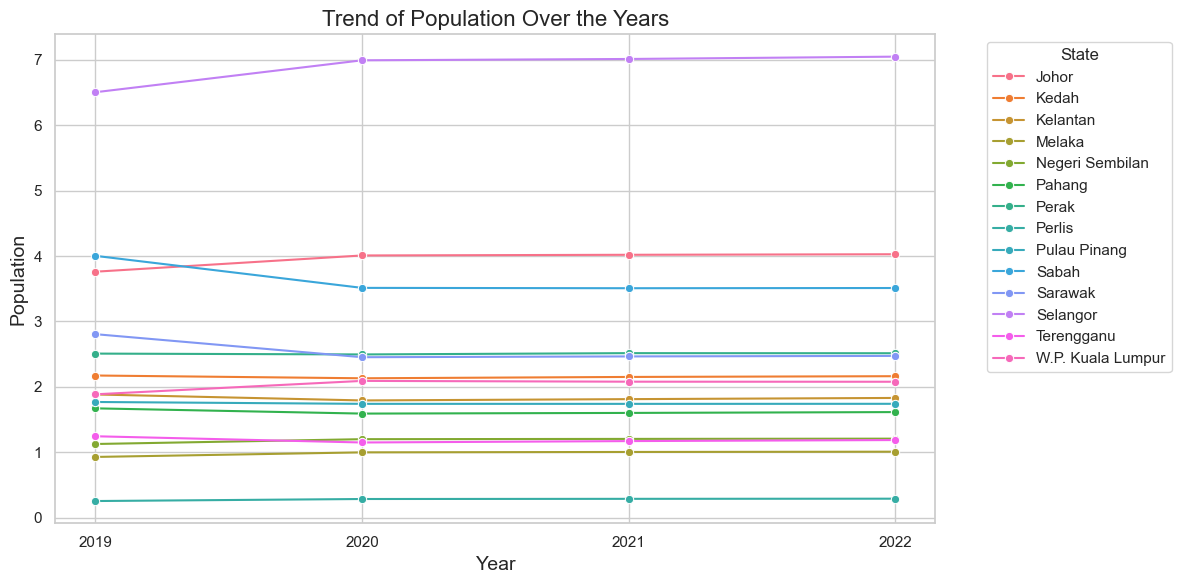

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', data=filtered_df_population, marker='o', hue='state')

plt.title('Trend of Population Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)

plt.xticks(ticks=filtered_df_population['year'].unique(), labels=filtered_df_population['year'].unique())

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From 2019 to 2022, most Malaysian states experienced steady population growth, with Selangor consistently having the largest population (6.5061M to 7.0503M). Perlis remained the least populated state, growing slightly from 0.254M to 0.2898M. Some states, like Sabah and Sarawak, saw slight population declines between 2019 and 2020 but later stabilized.

#### Summarizing Total Population per State (2019 - 2022)

In [40]:
total_population_per_state = filtered_df_population.groupby('state')['population'].sum().reset_index()
total_population_per_state.to_excel("final_population_dataset.xlsx", index=False)
total_population_per_state

,state,population
0,Johor,15.8192
1,Kedah,8.6199
2,Kelantan,7.3192
3,Melaka,3.9399
4,Negeri Sembilan,4.7383
5,Pahang,6.4785
6,Perak,10.0350
7,Perlis,1.1163
8,Pulau Pinang,6.9901
9,Sabah,14.5380


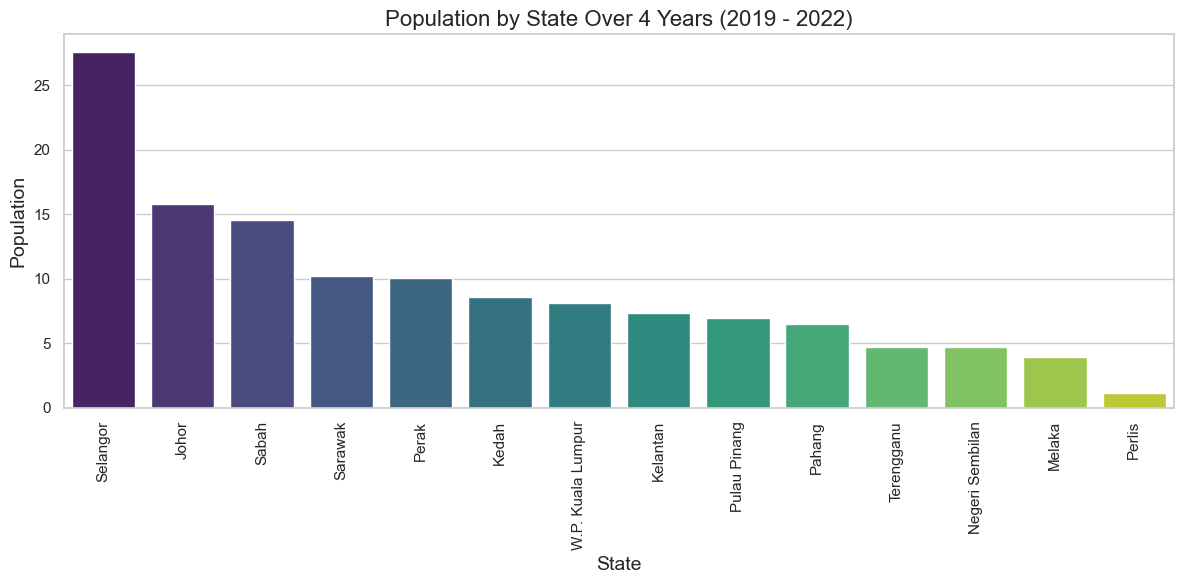

In [41]:
total_population_per_state_sorted = total_population_per_state.sort_values(by='population', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='population', data=total_population_per_state_sorted, hue='state', palette='viridis', legend=False)

plt.title('Population by State Over 4 Years (2019 - 2022)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Population', fontsize=14)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


This result shows that Selangor has the largest population at 27.57 million due to urban areas and residential hubs in Malaysia. Johor(15.82 million) and Sabah (14.5 million) due to geographical size and strategic importance. Sarawak(10.20 million), Perak(10.03 million), and Kedah (8.62 million) are less urbanized but have a significant population. Perlis has the smallest population (1.12 million) due to smallest state in Malaysia. However, Melaka(3.94 million) and Negeri Sembilan (4.74 million) have smaller populations. Conclusion Selangor and Kuala Lumpur are urbanized states in terms of population. While, Perlis, Kelantan, and Terengganu are rural states in terms of smaller population

#### Inspecting the Unemployment Dataset

In [42]:
df_unemployment

,date,state,lf,lf_employed,lf_unemployed,lf_outside,p_rate,u_rate
0,2017-01-01,Johor,1685.8,1634.6,51.2,816.9,67.4,3.0
1,2017-04-01,Johor,1675.2,1616.0,59.2,823.5,67.0,3.5
2,2017-07-01,Johor,1675.4,1607.7,67.7,830.7,66.9,4.0
3,2017-10-01,Johor,1684.4,1632.6,51.8,825.4,67.1,3.1
4,2018-01-01,Johor,1740.3,1691.7,48.6,784.8,68.9,2.8
...,...,...,...,...,...,...,...,...
475,2023-04-01,W.P. Putrajaya,38.7,38.5,0.2,11.7,76.8,0.5
476,2023-07-01,W.P. Putrajaya,38.5,38.3,0.2,12.4,75.6,0.5
477,2023-10-01,W.P. Putrajaya,38.4,37.8,0.6,13.2,74.4,1.5
478,2024-01-01,W.P. Putrajaya,36.5,35.7,0.8,13.6,72.9,2.1


In [43]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           480 non-null    datetime64[ns]
 1   state          480 non-null    object        
 2   lf             480 non-null    float64       
 3   lf_employed    480 non-null    float64       
 4   lf_unemployed  480 non-null    float64       
 5   lf_outside     480 non-null    float64       
 6   p_rate         480 non-null    float64       
 7   u_rate         480 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 30.1+ KB


#### Unemployment Data Preprocessing

In [44]:
# extract year from "date" (converted into a datetime object) and assign it to new column "year"
# df_unemployment["year"] = pd.to_datetime(df_unemployment["date"], format="%d-%m-%Y").dt.year
df_unemployment["year"] = df_unemployment["date"].dt.year

# filter the data
filtered_df_unemployment = df_unemployment[
    (df_unemployment["year"] >= start_year) & 
    (df_unemployment["year"] <= end_year)
]

# replace "state" W.P. Putrajaya with W.P. Kuala Lumpur and W.P. Labuan with Sabah
filtered_df_unemployment.loc[:, 'state'] = filtered_df_unemployment['state'].replace({'W.P. Putrajaya': 'W.P. Kuala Lumpur', 'W.P. Labuan': 'Sabah'})

# aggregate unemployment data by year and state
filtered_df_unemployment = filtered_df_unemployment.groupby(['year', 'state']).agg({
    'lf_unemployed': 'sum',
    'lf': 'sum'
}).reset_index()

# calculate annual unemployment rate as percentage 
# (unemployed labor force / total labor force) × 100
filtered_df_unemployment['annual_u_rate'] = (filtered_df_unemployment['lf_unemployed'] / filtered_df_unemployment['lf']) * 100

# selecting relevant columns: state, year, lf, annual_u_rate
filtered_df_unemployment = filtered_df_unemployment[['state', 'year', 'lf', 'annual_u_rate']]
filtered_df_unemployment.sort_values(by=['state', 'year'], inplace=True)
filtered_df_unemployment.reset_index(drop=True, inplace=True)

# save data to an Excel
filtered_df_unemployment.to_excel("filtered_unemployment_dataset.xlsx", index=False)
filtered_df_unemployment

,state,year,lf,annual_u_rate
0,Johor,2019,7211.4,2.731786
1,Johor,2020,7209.1,3.845140
2,Johor,2021,7206.9,3.833826
3,Johor,2022,7408.1,2.726745
4,Kedah,2019,3805.4,3.011510
5,Kedah,2020,3879.0,4.039701
6,Kedah,2021,4016.4,3.777014
7,Kedah,2022,4172.4,3.247531
8,Kelantan,2019,2868.8,4.859175
9,Kelantan,2020,2875.7,4.256355


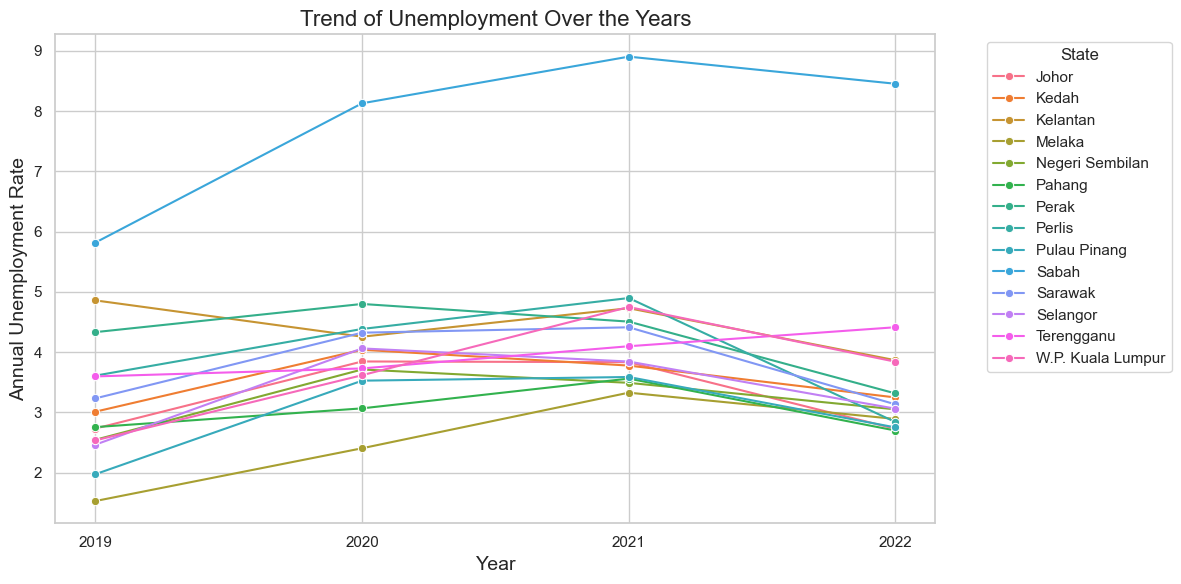

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='annual_u_rate', data=filtered_df_unemployment, marker='o', hue='state')

plt.title('Trend of Unemployment Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Unemployment Rate', fontsize=14)

plt.xticks(ticks=filtered_df_unemployment['year'].unique(), labels=filtered_df_unemployment['year'].unique())

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From 2019 to 2022, Sabah consistently had the highest unemployment rate, peaking at 8.91% in 2021, while Melaka had the lowest, starting at 1.53% in 2019 and rising to 2.89% in 2022. Selangor maintained the largest labor force, growing from 14,385.6K to 15,052.6K, while Perlis had the smallest, increasing slightly from 454.3K to 468.5K. Most states experienced spikes in unemployment during 2020-2021, reflecting pandemic impacts, with some improvement in 2022.

#### Summarizing Unemployment Rates per State (2019 - 2022)

In [46]:
# calculate weighted unemployment rate
filtered_df_unemployment['weighted_u_rate'] = filtered_df_unemployment['annual_u_rate'] * filtered_df_unemployment['lf']

# aggregate by state
weighted_avg_u_rate_per_state = filtered_df_unemployment.groupby('state').agg(
    total_weighted_u_rate=('weighted_u_rate', 'sum'),
    total_lf=('lf', 'sum')
).reset_index()

# calculate weighted average unemployment rate
# The weighted average accounts for labor force differences, resulting in a total unemployment rate that accurately reflects 
# the state’s employment conditions over the 4-year period.
weighted_avg_u_rate_per_state['weighted_avg_u_rate'] = weighted_avg_u_rate_per_state['total_weighted_u_rate'] / weighted_avg_u_rate_per_state['total_lf']


weighted_avg_u_rate_per_state = weighted_avg_u_rate_per_state[['state', 'weighted_avg_u_rate']]
weighted_avg_u_rate_per_state.to_excel("final_unemployment_dataset.xlsx", index=False)
weighted_avg_u_rate_per_state

,state,weighted_avg_u_rate
0,Johor,3.280467
1,Kedah,3.518509
2,Kelantan,4.414964
3,Melaka,2.546176
4,Negeri Sembilan,3.197156
5,Pahang,3.018608
6,Perak,4.231409
7,Perlis,3.924252
8,Pulau Pinang,2.970697
9,Sabah,7.829948


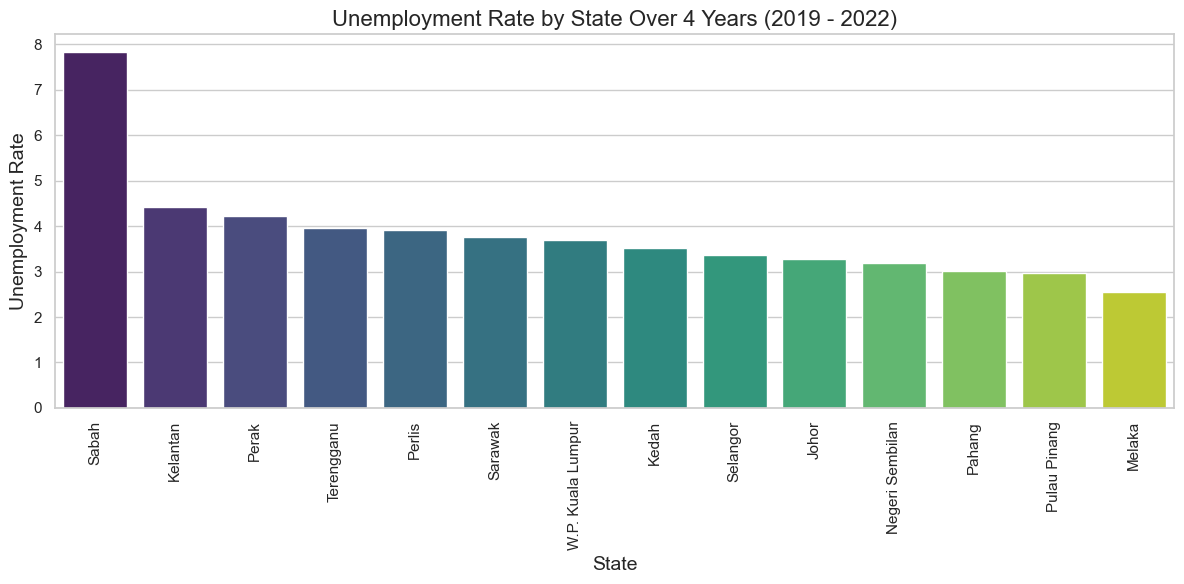

In [47]:
weighted_avg_u_rate_per_state_sorted = weighted_avg_u_rate_per_state.sort_values(by='weighted_avg_u_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='weighted_avg_u_rate', data=weighted_avg_u_rate_per_state_sorted, hue='state', palette='viridis', legend=False)

plt.title('Unemployment Rate by State Over 4 Years (2019 - 2022)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


According to this table, Sabah has the highest unemployment rate reflected by regional economic challenges while Melaka has the lowest unemployment rate and may be a healthier job market. Johor(3.28), Selangor(3.36), and Sarawak (3.77) indicate stable employment conditions. Kelantan(4.41) and Perak(4.23) indicate slightly higher unemployment due to Limited diversification in economic activities. rather Perlis(3.92) and Terengganu(3.96) middle higher unemployment because both states are less urbanized

## Merging Datasets for Analysis

In [48]:
final_df_crime = pd.read_excel("final_crimes_dataset.xlsx")
final_df_population = pd.read_excel("final_population_dataset.xlsx")
final_df_unemployment = pd.read_excel("final_unemployment_dataset.xlsx")

In [49]:
# merge all final datasets on "state"
merged_df = pd.merge(final_df_crime, final_df_population, on=['state'], how='inner')
merged_df = pd.merge(merged_df, final_df_unemployment, on=['state'], how='inner')
merged_df.to_excel("merged_dataset.xlsx", index=False)
merged_df

,state,total_crimes,population,weighted_avg_u_rate
0,Johor,26047,15.8192,3.280467
1,Kedah,18198,8.6199,3.518509
2,Kelantan,10299,7.3192,4.414964
3,Melaka,6962,3.9399,2.546176
4,Negeri Sembilan,9377,4.7383,3.197156
5,Pahang,9542,6.4785,3.018608
6,Perak,14485,10.0350,4.231409
7,Perlis,1858,1.1163,3.924252
8,Pulau Pinang,16364,6.9901,2.970697
9,Sabah,17073,14.5380,7.829948


This table shows the total crimes, population, and unemployment rate for every state in Malaysia. Selangor has the highest crime rate (65,004 total crimes) due to its largest population (27,57 million). Perlis has the lowest crime rate (1,858 total crimes) due to the smallest population(1.12 million). W.P. Kuala Lumpur shows exceptional results where the crime rate is higher (30,563) and the population (8.13 million) is smaller. For the Weighted Average Unemployment Rate, Sabah had the highest value (7.83) due to possible socioeconomic challenges. Melaka had the lowest value (2.55). In conclusion, states with a higher population such as  Selangor and Kuala Lumpur have higher crime issues. This data shows exceptional results like Sabah and Kuala Lumpur's unbalanced crime count and population size 

## Exploratory Data Analysis (EDA)

## Visualizing Total Crimes by State

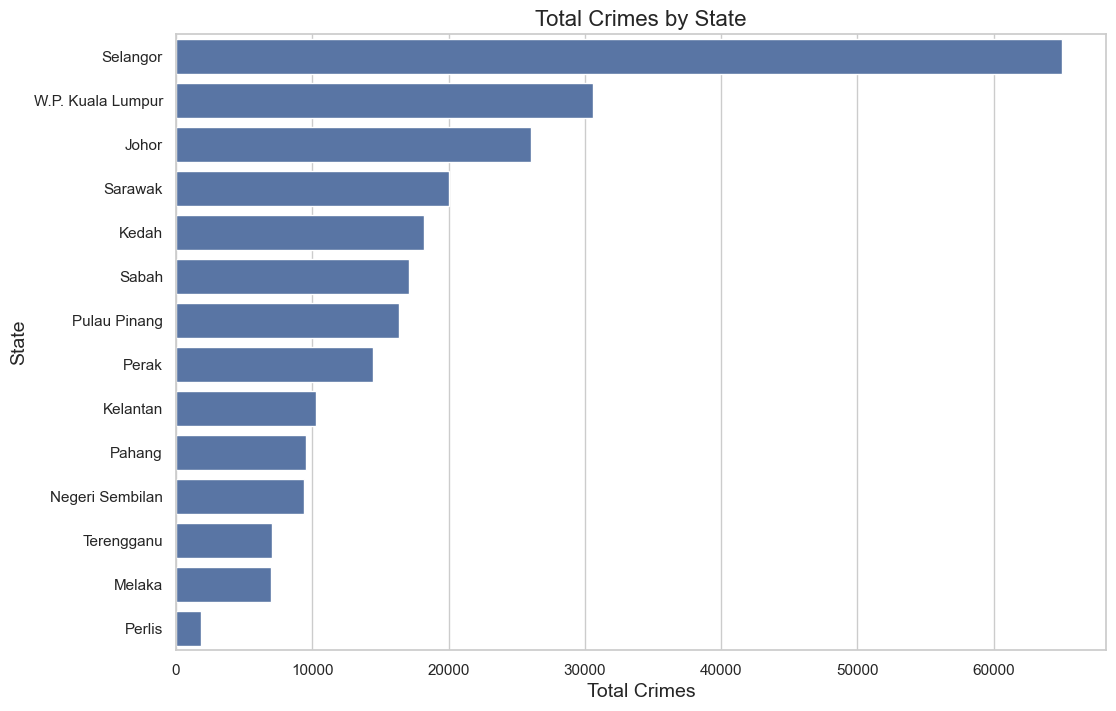

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_crimes', y='state', data=merged_df.sort_values('total_crimes', ascending=False), legend=False)
plt.title('Total Crimes by State', fontsize=16)
plt.xlabel('Total Crimes', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.show()

This graph shows the total crime by state. Selangor had the highest total of crimes and  W.P. Kuala Lumpur had the second highest total of crimes reflecting a high urban crime rate, most likely due to population density and urbanization. Johor had the third highest total of crimes which might be attributed to its size and proximity to Singapore, affecting cross-border activities such as business investment, retail commerce , tourism and etc . Sarawak, Kedah, and Sabah are in the middle with not too many but also not too little total crimes because of regional economic and social factors. Perlis, Melaka, and Terengganu are in the lower total crime in the graph due to their smaller populations and rural characteristics.

## Visualizing Population vs Total Crimes

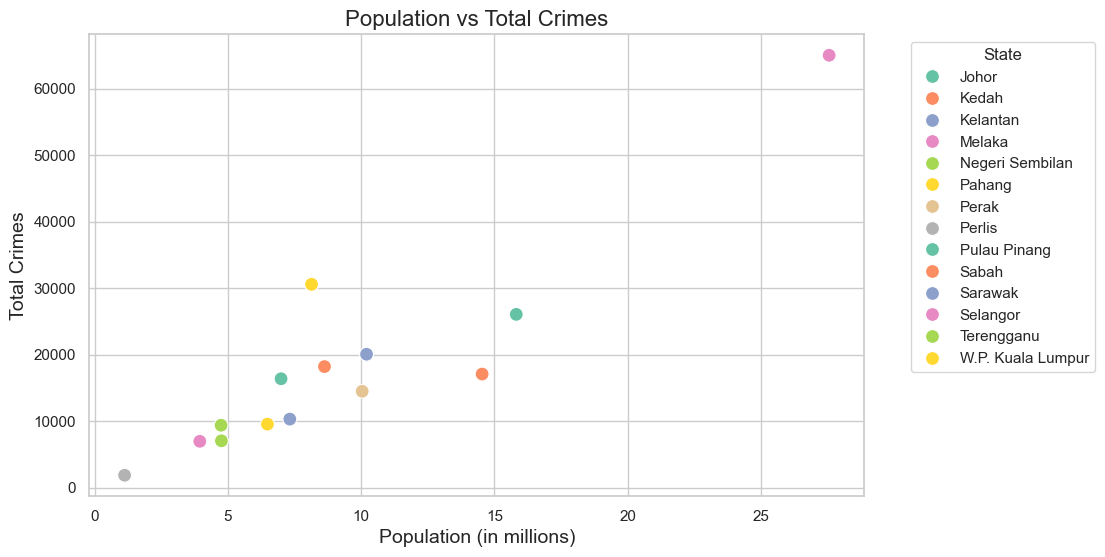

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='total_crimes', data=merged_df, hue='state', palette='Set2', s=100)
plt.title('Population vs Total Crimes', fontsize=16)
plt.xlabel('Population (in millions)', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot graph above shows a positive relationship between population and total crimes. As the population of a state increases, the total number of crimes tends to rise. States with higher population such as Selangor aligns with the correlation trend and stands out as a hotspot for crimes. Perlis, Melaka, and Terengganu are clustered near the lower left, reflecting both smaller populations and lower crime rates. 

## Visualizing Unemployment Rate vs Total Crimes

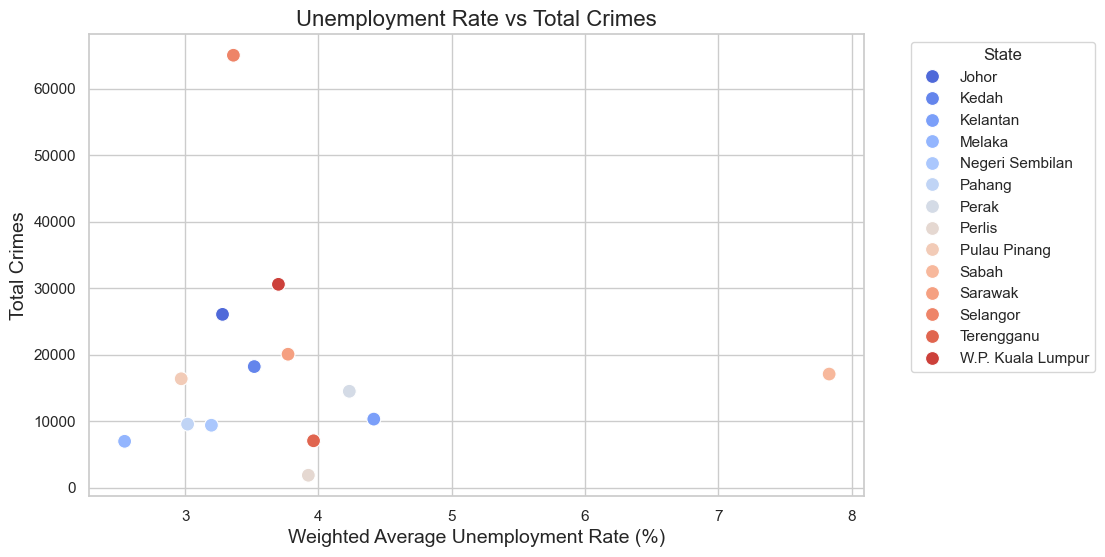

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weighted_avg_u_rate', y='total_crimes', data=merged_df, hue='state', palette='coolwarm', s=100)
plt.title('Unemployment Rate vs Total Crimes', fontsize=16)
plt.xlabel('Weighted Average Unemployment Rate (%)', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot graph above shows the relationship between weighted average unemployment rate and total crimes. In the bottom left of the graph, states with both low unemployment rates and low crime levels (e.g., Perlis, Melaka, Terengganu) are clustered. In the top right area, there is a cluster of states with high unemployment and high crime levels (e.g., Selangor, W.P. Kuala Lumpur). Selangor and W.P. Kuala Lumpur has high crime rates but relatively moderate unemployment rates while Sarawak and Sabah indicate high unemployment rates but comparatively lower crime levels. This graph proves that the perception in which a population with a high number of unemployed people commit a lot of crimes is false.


## Correlation Heatmap

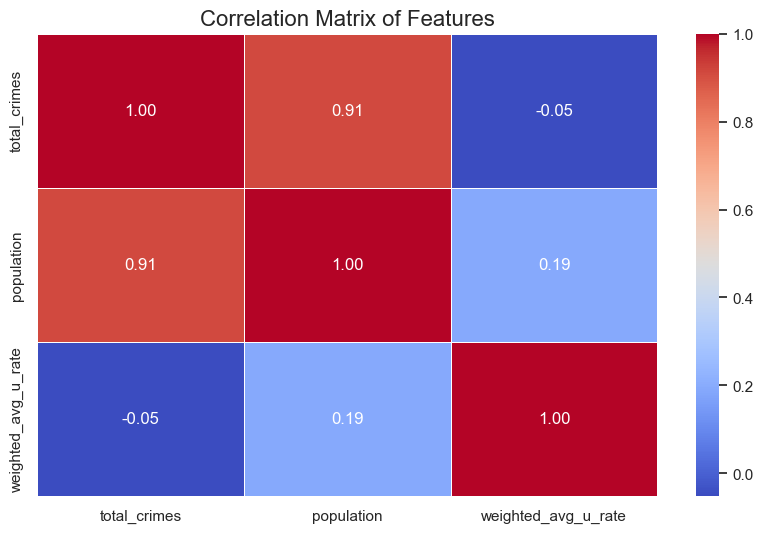

In [53]:
plt.figure(figsize=(10, 6))
correlation_matrix = merged_df[['total_crimes', 'population', 'weighted_avg_u_rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

The correlation heatmap reveals several insights about the relationships between total crimes, population, and the unemployment rate:

1. **Total Crimes and Population**: A strong positive correlation (r = 0.91) exists between total crimes and population, indicating that states with larger populations tend to experience higher crime rates. This could be attributed to increased interactions, opportunities for criminal activities, and migration from other areas, which contributes to population density in certain regions.

2. **Population and Unemployment Rate**: The positive correlation (r = 0.19) between population and unemployment rate suggests that larger populations may experience slightly higher unemployment rates, likely due to intensified competition for jobs in densely populated areas. Economic disparities in urban regions may also play a role in this trend.

3. **Unemployment Rate and Total Crimes**: A very weak negative correlation (r = -0.05) is observed between the unemployment rate and total crimes. This implies that unemployment does not have a strong influence on the number of crimes committed, suggesting that other factors, beyond unemployment, may be more influential in driving crime rates.

Overall, while there are some notable relationships, especially between population and total crimes, the lack of a significant correlation between unemployment and crime suggests that other socio-economic factors such as poverty should also be considered in future analyses of crime patterns.

## Discussion

The findings from the analysis highlight several key relationships between crime rates, population, and unemployment, offering valuable insights for policymakers, law enforcement agencies, and social organizations. These insights, combined with appropriate interventions, can contribute to reducing crime rates and improving societal well-being.

1. Addressing High Crime Rates in Densely Populated Areas:
The strong positive correlation between population and total crimes suggests that states with larger populations face more significant challenges in managing crime. This could be due to increased social interactions, higher urbanization rates, and migration patterns. The government can take several steps to address these challenges:
- Enhancing Community Policing: Increasing police presence and fostering strong community relationships can deter criminal activities in urban areas.
- Urban Planning and Infrastructure: Designing safer urban environments with well-lit public spaces and efficient public transport can reduce opportunities for crime.
- Promoting Community Engagement: Programs that involve citizens in neighborhood watch initiatives and crime prevention education can empower communities to take action.

2. Tackling Economic Disparities in Job Markets:
The positive correlation between population and unemployment rate highlights the need for economic interventions in densely populated states. The government and private sector can work together to:
- Stimulate Job Creation: Encouraging investment in industries that can absorb a larger workforce, such as manufacturing, services, and technology, can reduce unemployment.
- Upskilling Programs: Providing training and educational opportunities tailored to market demands can equip individuals with skills that make them employable.
- Targeted Support for Vulnerable Groups: Offering financial assistance, housing, and social programs for marginalized communities can help alleviate economic strain.

3. Beyond Unemployment: Addressing Other Drivers of Crime:
The weak correlation between unemployment and crime suggests that other factors—such as poverty, education levels, mental health, and substance abuse—may play a more significant role in driving criminal behavior. Policymakers should consider a holistic approach:
- Combating Poverty: Expanding social welfare programs and improving access to basic services such as healthcare, education, and housing can reduce the economic pressures that contribute to crime.
- Investing in Education: Early education programs, particularly in at-risk communities, can provide young people with alternatives to criminal activities.
- Mental Health and Rehabilitation Services: Strengthening mental health services and providing rehabilitation programs for offenders can address underlying issues and reduce recidivism.